In [3]:
import pandas as pd

In [4]:
# Load datasets
new_data = pd.read_csv("Finbert_output_AAPL.csv")
aapl_data = pd.read_csv("merged_aapl_spy.csv")

# Convert dates
aapl_data["Date"] = pd.to_datetime(aapl_data["timestamp"], utc=True).dt.floor('min')
new_data["Date"] = pd.to_datetime(new_data["Date"], utc=True).dt.floor('min')

# Outer merge to avoid losing rows
merged_data = pd.merge(aapl_data, new_data[['Date', 'Compound','Positive','Negative','Neutral']], on="Date", how='left')

# Sort by date to prepare for filling
merged_data = merged_data.sort_values("Date")

# Forward-fill missing sentiment scores
merged_data["Compound"] = merged_data["Compound"].ffill()
merged_data["Positive"] = merged_data["Positive"].ffill()
merged_data["Negative"] = merged_data["Negative"].ffill()
merged_data["Neutral"] = merged_data["Neutral"].ffill()
# (Optional) Backward-fill to handle initial missing values, if necessary
merged_data["Compound"] = merged_data["Compound"].bfill()
merged_data["Positive"] = merged_data["Positive"].bfill()
merged_data["Negative"] = merged_data["Negative"].bfill()
merged_data["Neutral"] = merged_data["Neutral"].bfill()

# Now merged_data retains all rows from both datasets


In [5]:
merged_data

,timestamp,open_AAPL,high_AAPL,low_AAPL,close_AAPL,volume_AAPL,open_SPY,high_SPY,low_SPY,close_SPY,volume_SPY,Date,Compound,Positive,Negative,Neutral
0,2022-01-03 04:00:00,175.1997,175.1997,175.1505,175.1505,863,454.4770,454.9922,454.4770,454.7537,7079.0,2022-01-03 04:00:00+00:00,-0.904202,0.030585,0.934787,0.034628
1,2022-01-03 04:02:00,175.2685,175.2783,175.2488,175.2488,881,454.7155,454.7155,454.6869,454.6869,210.0,2022-01-03 04:02:00+00:00,-0.904202,0.030585,0.934787,0.034628
2,2022-01-03 04:03:00,175.2193,175.2390,175.2193,175.2390,482,454.6678,454.6678,454.5724,454.6487,400.0,2022-01-03 04:03:00+00:00,-0.904202,0.030585,0.934787,0.034628
3,2022-01-03 04:04:00,175.1702,175.1702,175.0916,175.0916,2545,454.5915,454.6487,454.5915,454.6487,200.0,2022-01-03 04:04:00+00:00,-0.904202,0.030585,0.934787,0.034628
4,2022-01-03 04:05:00,175.1407,175.1407,175.1407,175.1407,147,454.5915,454.6487,454.5915,454.6487,200.0,2022-01-03 04:05:00+00:00,-0.904202,0.030585,0.934787,0.034628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722078,2025-03-26 19:55:00,221.3400,221.5100,221.3400,221.3400,706,567.6800,567.6800,567.5500,567.5700,2177.0,2025-03-26 19:55:00+00:00,0.921957,0.947436,0.025479,0.027084
722079,2025-03-26 19:56:00,221.5000,221.5000,221.3300,221.5000,627,567.6000,567.6450,567.5500,567.5500,5273.0,2025-03-26 19:56:00+00:00,0.921957,0.947436,0.025479,0.027084
722080,2025-03-26 19:57:00,221.5000,221.5000,221.4000,221.5000,413,567.5600,567.5999,567.5000,567.5500,4662.0,2025-03-26 19:57:00+00:00,0.921957,0.947436,0.025479,0.027084
722081,2025-03-26 19:58:00,221.4500,221.4500,220.9500,220.9500,389,567.5300,567.5700,567.5000,567.5294,518.0,2025-03-26 19:58:00+00:00,0.921957,0.947436,0.025479,0.027084


In [6]:
merged_data=merged_data.drop(['timestamp','open_SPY', 'high_SPY', 'low_SPY','volume_SPY'], axis = 1)

In [7]:
merged_data = merged_data.rename(columns={
    'open_AAPL': 'Open',
    'high_AAPL': 'High',
    'low_AAPL': 'Low',
    'close_AAPL': 'Close',
    'volume_AAPL': 'Volume'
})


In [8]:
merged_data

,Open,High,Low,Close,Volume,close_SPY,Date,Compound,Positive,Negative,Neutral
0,175.1997,175.1997,175.1505,175.1505,863,454.7537,2022-01-03 04:00:00+00:00,-0.904202,0.030585,0.934787,0.034628
1,175.2685,175.2783,175.2488,175.2488,881,454.6869,2022-01-03 04:02:00+00:00,-0.904202,0.030585,0.934787,0.034628
2,175.2193,175.2390,175.2193,175.2390,482,454.6487,2022-01-03 04:03:00+00:00,-0.904202,0.030585,0.934787,0.034628
3,175.1702,175.1702,175.0916,175.0916,2545,454.6487,2022-01-03 04:04:00+00:00,-0.904202,0.030585,0.934787,0.034628
4,175.1407,175.1407,175.1407,175.1407,147,454.6487,2022-01-03 04:05:00+00:00,-0.904202,0.030585,0.934787,0.034628
...,...,...,...,...,...,...,...,...,...,...,...
722078,221.3400,221.5100,221.3400,221.3400,706,567.5700,2025-03-26 19:55:00+00:00,0.921957,0.947436,0.025479,0.027084
722079,221.5000,221.5000,221.3300,221.5000,627,567.5500,2025-03-26 19:56:00+00:00,0.921957,0.947436,0.025479,0.027084
722080,221.5000,221.5000,221.4000,221.5000,413,567.5500,2025-03-26 19:57:00+00:00,0.921957,0.947436,0.025479,0.027084
722081,221.4500,221.4500,220.9500,220.9500,389,567.5294,2025-03-26 19:58:00+00:00,0.921957,0.947436,0.025479,0.027084


In [9]:
merged_data = merged_data[[
    'Date','Open', 'High', 'Low', 'Close', 'Volume',
    'close_SPY','Compound','Positive','Negative','Neutral'
]]

In [10]:
merged_data = merged_data.rename(columns={
    'close_SPY': 'SPY_close'
})

In [11]:
merged_data

,Date,Open,High,Low,Close,Volume,SPY_close,Compound,Positive,Negative,Neutral
0,2022-01-03 04:00:00+00:00,175.1997,175.1997,175.1505,175.1505,863,454.7537,-0.904202,0.030585,0.934787,0.034628
1,2022-01-03 04:02:00+00:00,175.2685,175.2783,175.2488,175.2488,881,454.6869,-0.904202,0.030585,0.934787,0.034628
2,2022-01-03 04:03:00+00:00,175.2193,175.2390,175.2193,175.2390,482,454.6487,-0.904202,0.030585,0.934787,0.034628
3,2022-01-03 04:04:00+00:00,175.1702,175.1702,175.0916,175.0916,2545,454.6487,-0.904202,0.030585,0.934787,0.034628
4,2022-01-03 04:05:00+00:00,175.1407,175.1407,175.1407,175.1407,147,454.6487,-0.904202,0.030585,0.934787,0.034628
...,...,...,...,...,...,...,...,...,...,...,...
722078,2025-03-26 19:55:00+00:00,221.3400,221.5100,221.3400,221.3400,706,567.5700,0.921957,0.947436,0.025479,0.027084
722079,2025-03-26 19:56:00+00:00,221.5000,221.5000,221.3300,221.5000,627,567.5500,0.921957,0.947436,0.025479,0.027084
722080,2025-03-26 19:57:00+00:00,221.5000,221.5000,221.4000,221.5000,413,567.5500,0.921957,0.947436,0.025479,0.027084
722081,2025-03-26 19:58:00+00:00,221.4500,221.4500,220.9500,220.9500,389,567.5294,0.921957,0.947436,0.025479,0.027084


In [12]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 722083 entries, 0 to 722082
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype              
---  ------     --------------   -----              
 0   Date       722083 non-null  datetime64[ns, UTC]
 1   Open       722083 non-null  float64            
 2   High       722083 non-null  float64            
 3   Low        722083 non-null  float64            
 4   Close      722083 non-null  float64            
 5   Volume     722083 non-null  int64              
 6   SPY_close  722083 non-null  float64            
 7   Compound   722083 non-null  float64            
 8   Positive   722083 non-null  float64            
 9   Negative   722083 non-null  float64            
 10  Neutral    722083 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(9), int64(1)
memory usage: 66.1 MB


In [13]:
merged_data.describe()

,Open,High,Low,Close,Volume,SPY_close,Compound,Positive,Negative,Neutral
count,722083.000000,722083.000000,722083.000000,722083.000000,7.220830e+05,722083.000000,722083.000000,722083.000000,722083.000000,722083.000000
mean,182.549290,182.623392,182.466929,182.549080,7.466044e+04,463.107657,0.004395,0.291064,0.286669,0.422268
std,32.018777,32.035766,32.000108,32.018849,6.530626e+05,76.393518,0.626523,0.344160,0.383654,0.372479
min,122.776300,122.825700,122.746600,122.776300,1.000000e+00,336.081300,-0.970105,0.006108,0.006003,0.008806
25%,158.782400,158.851300,158.703800,158.778000,5.360000e+02,398.802100,-0.594442,0.031379,0.015282,0.041016
50%,176.264100,176.323900,176.204900,176.264100,6.114000e+03,437.472800,0.039157,0.095704,0.034580,0.301061
75%,210.643800,210.753400,210.484300,210.643800,8.466300e+04,533.596800,0.481660,0.555252,0.694166,0.840493
max,265.862700,273.076900,259.425100,259.644800,2.431802e+08,611.335600,0.945250,0.960771,0.977615,0.956653


In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import ta  # Technical Analysis library (pip install ta)

In [22]:
# RSI (14 periods is standard)
merged_data['RSI'] = ta.momentum.rsi(merged_data['Close'], window=60)

# EMA (20 periods is commonly used)
merged_data['EMA'] = ta.trend.ema_indicator(merged_data['Close'], window=60)


In [23]:
merged_data

,Date,Open,High,Low,Close,Volume,SPY_close,Compound,Positive,Negative,Neutral,RSI,EMA
0,2022-01-03 04:00:00+00:00,175.1997,175.1997,175.1505,175.1505,863,454.7537,-0.904202,0.030585,0.934787,0.034628,NaN,NaN
1,2022-01-03 04:02:00+00:00,175.2685,175.2783,175.2488,175.2488,881,454.6869,-0.904202,0.030585,0.934787,0.034628,NaN,NaN
2,2022-01-03 04:03:00+00:00,175.2193,175.2390,175.2193,175.2390,482,454.6487,-0.904202,0.030585,0.934787,0.034628,NaN,NaN
3,2022-01-03 04:04:00+00:00,175.1702,175.1702,175.0916,175.0916,2545,454.6487,-0.904202,0.030585,0.934787,0.034628,NaN,NaN
4,2022-01-03 04:05:00+00:00,175.1407,175.1407,175.1407,175.1407,147,454.6487,-0.904202,0.030585,0.934787,0.034628,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
722078,2025-03-26 19:55:00+00:00,221.3400,221.5100,221.3400,221.3400,706,567.5700,0.921957,0.947436,0.025479,0.027084,52.730155,221.060554
722079,2025-03-26 19:56:00+00:00,221.5000,221.5000,221.3300,221.5000,627,567.5500,0.921957,0.947436,0.025479,0.027084,54.111132,221.074962
722080,2025-03-26 19:57:00+00:00,221.5000,221.5000,221.4000,221.5000,413,567.5500,0.921957,0.947436,0.025479,0.027084,54.111132,221.088897
722081,2025-03-26 19:58:00+00:00,221.4500,221.4500,220.9500,220.9500,389,567.5294,0.921957,0.947436,0.025479,0.027084,49.019975,221.084343


In [24]:
# Պահպանում ենք արդյունքը CSV ֆայլում
merged_data.to_csv("merged_filtered_aapl_by_news_range.csv", index=False)

print("✅ Միավորումը և ֆիլտրման արդյունքը պահպանվեց՝ 'merged_filtered_aapl_by_news_range.csv' անունով։")

✅ Միավորումը և ֆիլտրման արդյունքը պահպանվեց՝ 'merged_filtered_aapl_by_news_range.csv' անունով։


In [25]:
df = merged_data
df['date'] = pd.to_datetime(df['Date'])        # Fix column name
df.set_index('date', inplace=True)             # Set datetime index
monthly_sentiment = df['Compound'].resample('M').mean().reset_index()


C:\Users\S145\AppData\Local\Temp\ipykernel_6008\55989959.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sentiment = df['Compound'].resample('M').mean().reset_index()


C:\Program Files\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Program Files\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Program Files\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


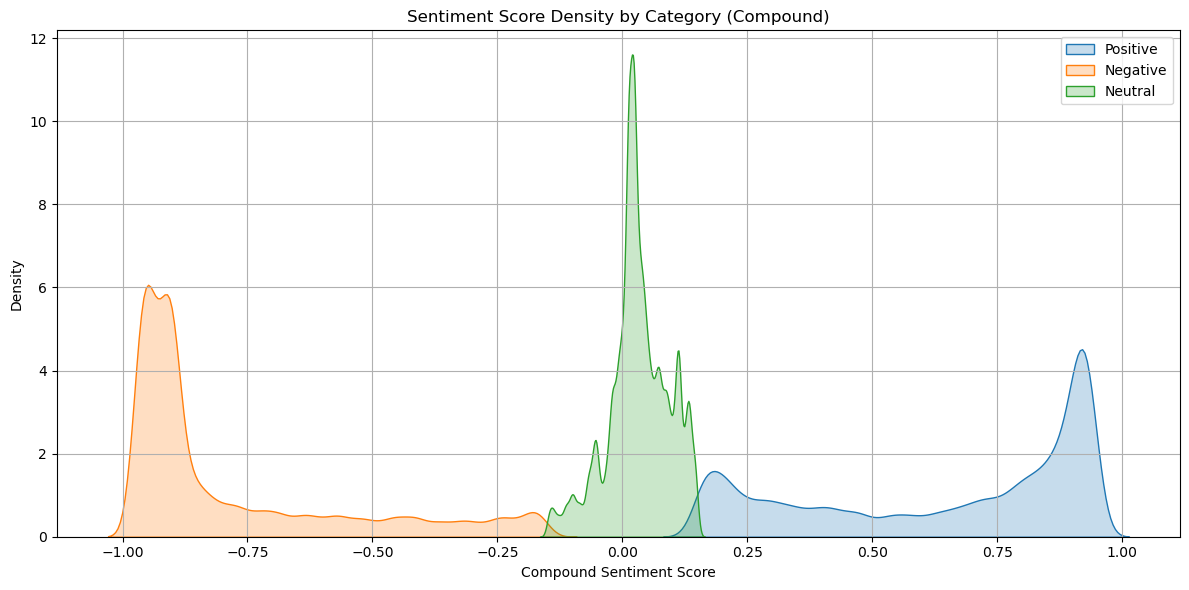

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Categorize sentiment
df['SentimentCategory'] = df['Compound'].apply(
    lambda x: 'Positive' if x > 0.15 else ('Negative' if x < -0.15 else 'Neutral')
)

# Plot KDE for each sentiment category
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df[df['SentimentCategory'] == 'Positive']['Compound'], label='Positive', fill=True)
sns.kdeplot(data=df[df['SentimentCategory'] == 'Negative']['Compound'], label='Negative', fill=True)
sns.kdeplot(data=df[df['SentimentCategory'] == 'Neutral']['Compound'], label='Neutral', fill=True)

plt.title('Sentiment Score Density by Category (Compound)')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

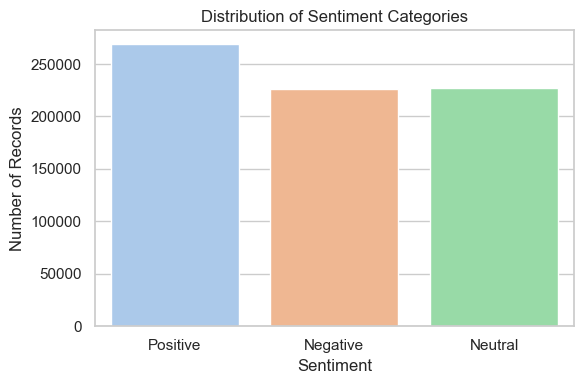

In [27]:
# Count how many instances fall into each sentiment category
sentiment_counts = df['SentimentCategory'].value_counts().reindex(['Positive', 'Negative', 'Neutral']).fillna(0)

# Plotting bar chart like the image example
plt.figure(figsize=(6, 4))
sns.set(style="whitegrid")
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='pastel')

plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment')
plt.ylabel('Number of Records')
plt.tight_layout()
plt.show()


In [28]:
# Re-importing libraries due to previous environment reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Load the dataset again
file_path = "merged_filtered_aapl_by_news_range.csv"
data = pd.read_csv(file_path)

# Convert date and sort
data["Date"] = pd.to_datetime(data["Date"], utc=True)
data = data.sort_values("Date")

# Drop any missing values
data = data.dropna(subset=["Close", "Compound","Positive","Negative","Neutral"])

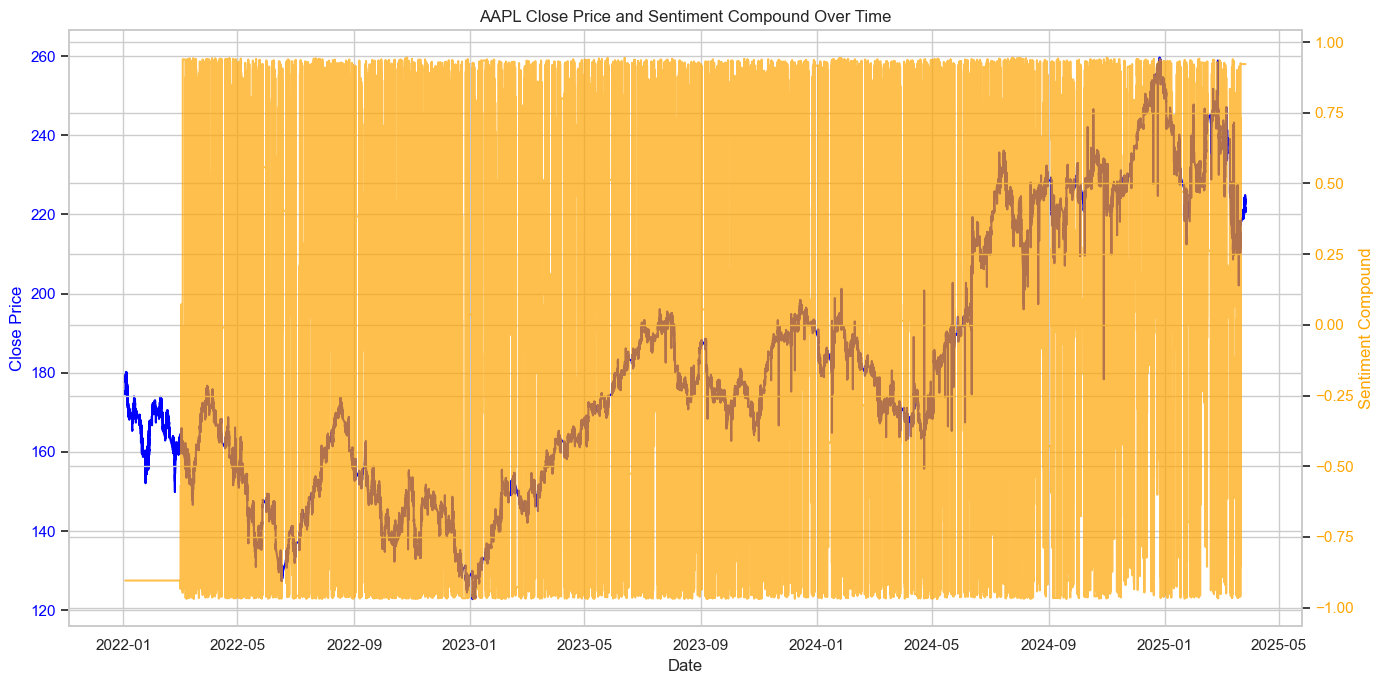

In [30]:
# Visualization
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot Close price
ax1.plot(data["Date"], data["Close"], color='blue', label='Close Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Secondary axis for Sentiment Compound
ax2 = ax1.twinx()
ax2.plot(data["Date"], data["Compound"], color='orange', alpha=0.7, label='Sentiment Compound')
ax2.set_ylabel('Sentiment Compound', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('AAPL Close Price and Sentiment Compound Over Time')
fig.tight_layout()
ax1.grid(True)

plt.show()

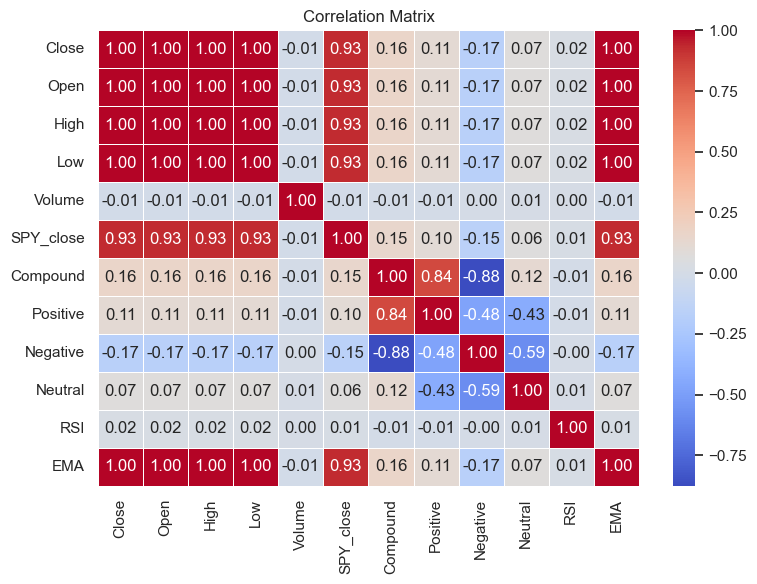

In [32]:
# Compute correlation matrix
correlation_matrix = data[['Close', 'Open', 'High', 'Low', 'Volume', 'SPY_close','Compound',"Positive","Negative","Neutral","RSI","EMA"]].corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


In [33]:
# Re-importing necessary libraries due to the environment reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset again
file_path = "merged_filtered_aapl_by_news_range.csv"
data = pd.read_csv(file_path)

# Convert Date to datetime and sort
data["Date"] = pd.to_datetime(data["Date"], utc=True)
data = data.sort_values("Date")

# Calculate returns from Close prices
data["Return"] = data["Close"].pct_change()

# Display first few rows to verify
data


,Date,Open,High,Low,Close,Volume,SPY_close,Compound,Positive,Negative,Neutral,RSI,EMA,Return
0,2022-01-03 04:00:00+00:00,175.1997,175.1997,175.1505,175.1505,863,454.7537,-0.904202,0.030585,0.934787,0.034628,NaN,NaN,NaN
1,2022-01-03 04:02:00+00:00,175.2685,175.2783,175.2488,175.2488,881,454.6869,-0.904202,0.030585,0.934787,0.034628,NaN,NaN,0.000561
2,2022-01-03 04:03:00+00:00,175.2193,175.2390,175.2193,175.2390,482,454.6487,-0.904202,0.030585,0.934787,0.034628,NaN,NaN,-0.000056
3,2022-01-03 04:04:00+00:00,175.1702,175.1702,175.0916,175.0916,2545,454.6487,-0.904202,0.030585,0.934787,0.034628,NaN,NaN,-0.000841
4,2022-01-03 04:05:00+00:00,175.1407,175.1407,175.1407,175.1407,147,454.6487,-0.904202,0.030585,0.934787,0.034628,NaN,NaN,0.000280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722078,2025-03-26 19:55:00+00:00,221.3400,221.5100,221.3400,221.3400,706,567.5700,0.921957,0.947436,0.025479,0.027084,52.730155,221.060554,-0.000226
722079,2025-03-26 19:56:00+00:00,221.5000,221.5000,221.3300,221.5000,627,567.5500,0.921957,0.947436,0.025479,0.027084,54.111132,221.074962,0.000723
722080,2025-03-26 19:57:00+00:00,221.5000,221.5000,221.4000,221.5000,413,567.5500,0.921957,0.947436,0.025479,0.027084,54.111132,221.088897,0.000000
722081,2025-03-26 19:58:00+00:00,221.4500,221.4500,220.9500,220.9500,389,567.5294,0.921957,0.947436,0.025479,0.027084,49.019975,221.084343,-0.002483


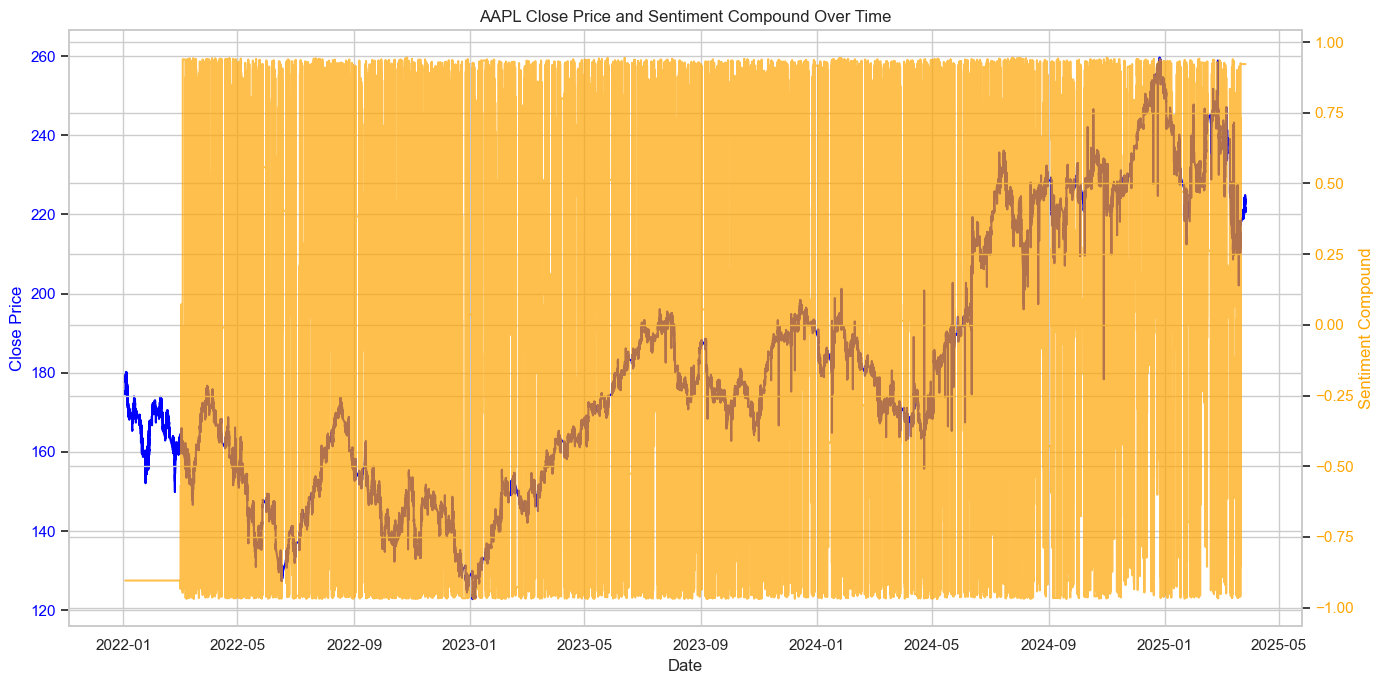

In [34]:
# Visualization
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot Close price
ax1.plot(data["Date"], data["Close"], color='blue', label='Close Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Secondary axis for Sentiment Compound
ax2 = ax1.twinx()
ax2.plot(data["Date"], data["Compound"], color='orange', alpha=0.7, label='Sentiment Compound')
ax2.set_ylabel('Sentiment Compound', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('AAPL Close Price and Sentiment Compound Over Time')
fig.tight_layout()
ax1.grid(True)

plt.show()

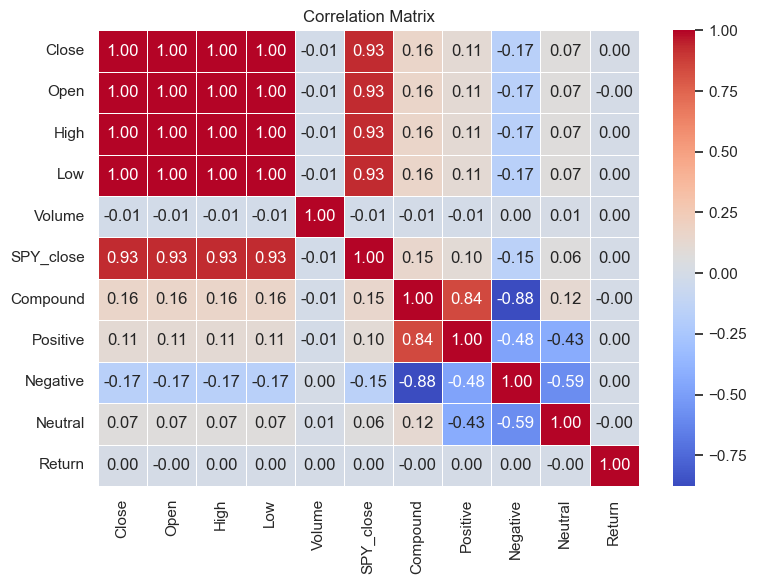

In [35]:
# Compute correlation matrix
correlation_matrix = data[['Close', 'Open', 'High', 'Low', 'Volume', 'SPY_close','Compound',"Positive","Negative","Neutral","Return"]].corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

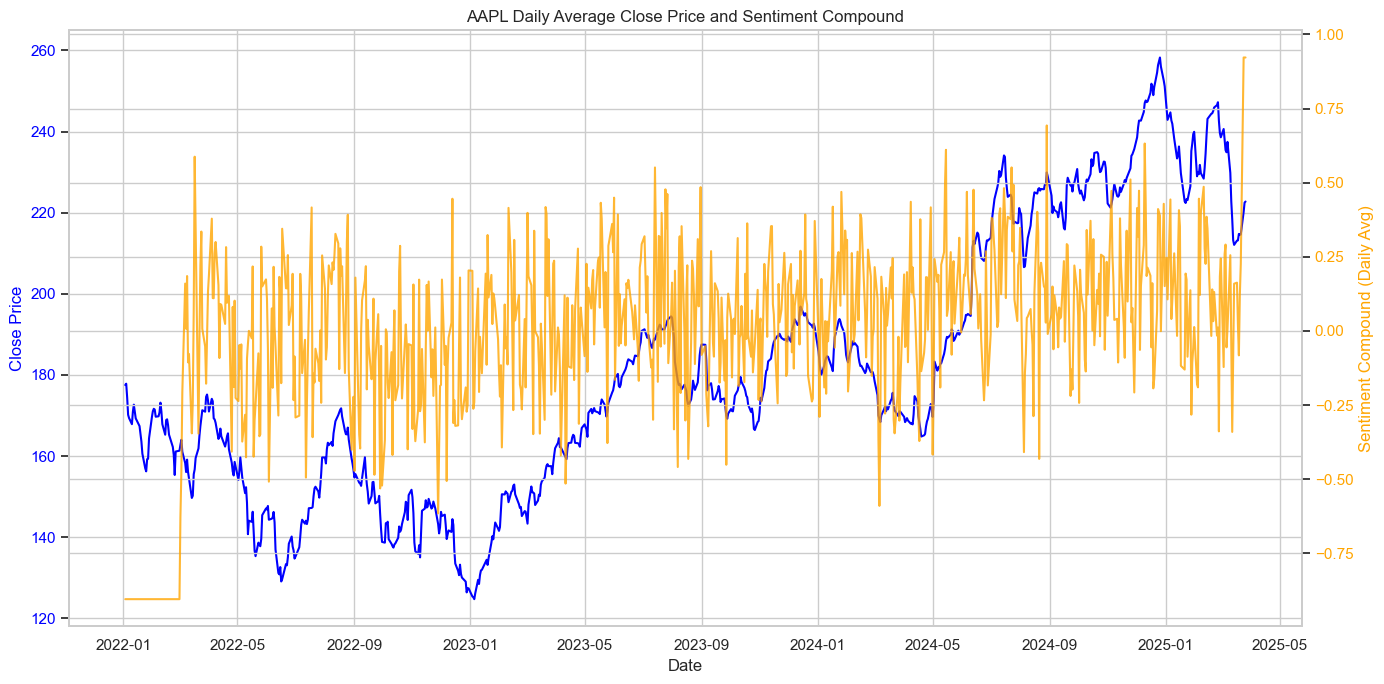

In [36]:
# Resample to daily averages to smooth out sentiment data
daily_data = data.set_index('Date').resample('D').agg({
    'Close': 'mean',
    'Compound': 'mean'
}).dropna()

# Plot daily averaged data
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot daily average Close price
ax1.plot(daily_data.index, daily_data["Close"], color='blue', label='Close Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot daily average Sentiment Compound
ax2 = ax1.twinx()
ax2.plot(daily_data.index, daily_data["Compound"], color='orange', label='Sentiment Compound', alpha=0.8)
ax2.set_ylabel('Sentiment Compound (Daily Avg)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Titles and grid
plt.title('AAPL Daily Average Close Price and Sentiment Compound')
fig.tight_layout()
ax1.grid(True)

plt.show()


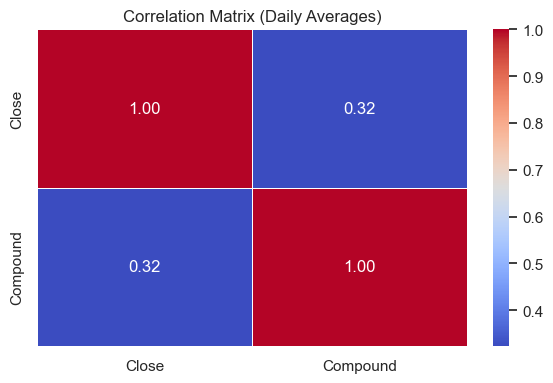

In [37]:
# Compute and display correlation matrix of daily averaged data
correlation_matrix_daily = daily_data[['Close', 'Compound']].corr()

# Visualize correlation matrix as heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix_daily, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (Daily Averages)")
plt.tight_layout()
plt.show()


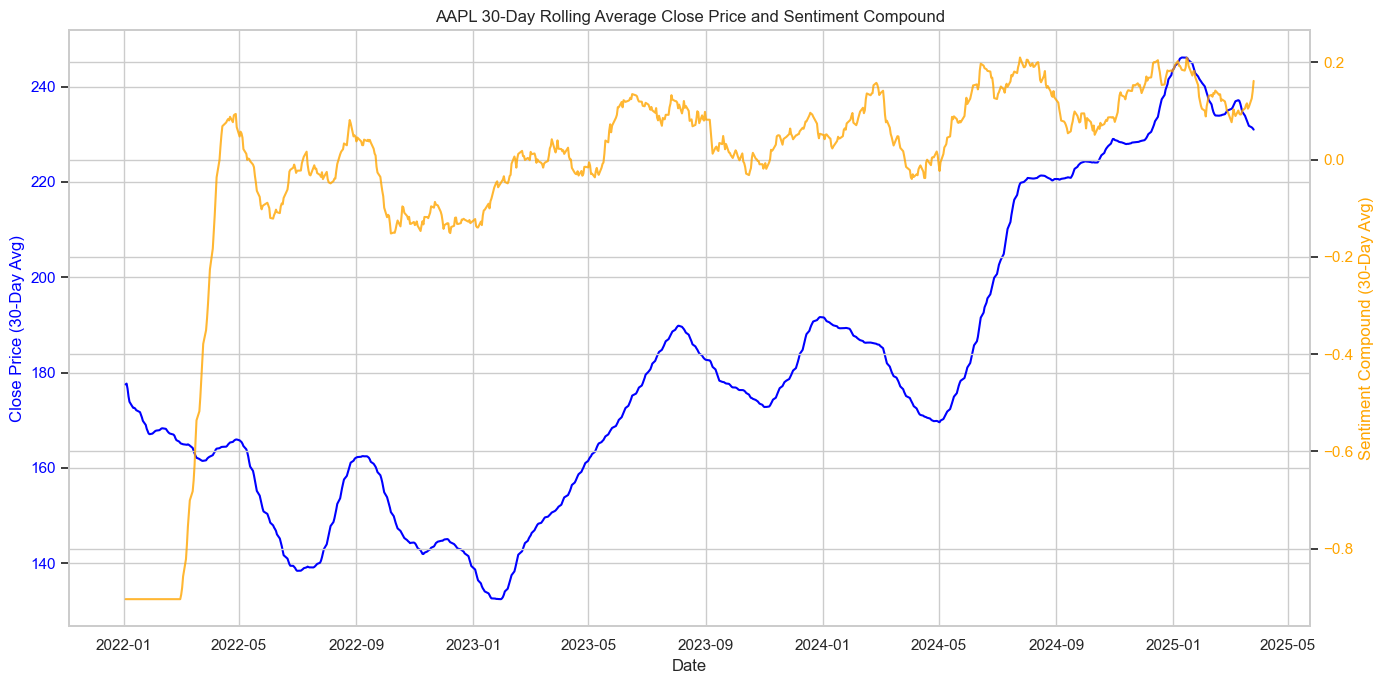

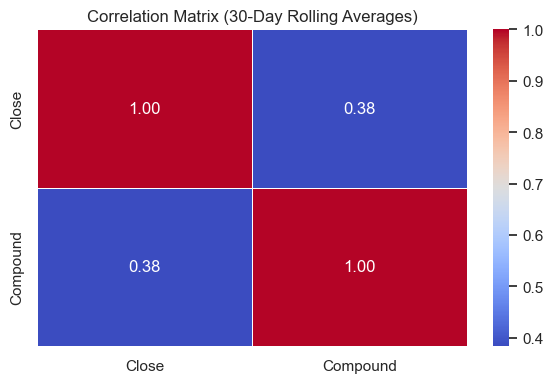

In [38]:
# Apply a 30-day rolling mean to smooth Close price and sentiment scores
daily_data_smoothed_30d = daily_data.rolling(window=30, min_periods=1).mean()

# Plot 30-day rolling averaged data
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot 30-day rolling average Close price
ax1.plot(daily_data_smoothed_30d.index, daily_data_smoothed_30d["Close"], color='blue', label='Close Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price (30-Day Avg)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot 30-day rolling average Sentiment Compound
ax2 = ax1.twinx()
ax2.plot(daily_data_smoothed_30d.index, daily_data_smoothed_30d["Compound"], color='orange', label='Sentiment Compound', alpha=0.8)
ax2.set_ylabel('Sentiment Compound (30-Day Avg)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Titles and grid
plt.title('AAPL 30-Day Rolling Average Close Price and Sentiment Compound')
fig.tight_layout()
ax1.grid(True)

plt.show()

# Calculate correlation matrix of smoothed data
correlation_matrix_smoothed_30d = daily_data_smoothed_30d[['Close', 'Compound']].corr()

# Plot correlation matrix as heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix_smoothed_30d, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (30-Day Rolling Averages)")
plt.tight_layout()
plt.show()
